<a href="https://colab.research.google.com/github/booted-re/Codestates-section2-Project/blob/main/Section2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CodeStates AIB14 
# Section2 Project

## **1. 문제 정의**
많은 태아/산모의 사망이 의료 환경이 뒷받침되지 못하는 상황에서 적절한 치료 없이 발생하고 있다. 

*   전 세계적으로 295,000건 (2017년)
*   이 중 94%는 의료 환경이 미흡한 곳에서 발생하며 대부분은 예방가능함.

###Import Packages and Dataset

In [ ]:
#Install
!pip install category_encoders
!pip install eli5

In [2]:
#Import
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay

import eli5
from eli5.sklearn import PermutationImportance 

from IPython.display import display 
import matplotlib.pyplot as plt

files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving fetal_health.csv to fetal_health.csv


{'fetal_health.csv': b'baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health\n120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0\n132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0\n133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0\n134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0\n132.0,0.007,0.0,0.008,0.0,0.0,0.0,16.0,2.4,0.0,19.9,

In [3]:
df = pd.read_csv('fetal_health.csv')

## **2. 가설 설정**
* 초음파검사(Cardiotocograms, CTGs)는 산모/태아를 위한 가장 접근성이 높은 진단 수단 중 하나다. 
* 진단 데이터를 머신 러닝을 통한 모델링으로 높은 정확도의 분류가 가능하다면, 의료 자원의 사용을 최적화할 수 있다. 

###사용 데이터셋
>**Reference**  
>*Ayres de Campos et al.* (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318


###Dataset Analysis and EDA

In [4]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [57]:
def qview(df):
  print(f'Dimension :{df.shape}\n')
  print('Total Missing Value Counts:', df.isna().sum().sum(), '\n')
  print(df.dtypes)
  print(df.nunique())
  
qview(df)

Dimension :(2126, 22)

Total Missing Value Counts: 0 

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_p

In [97]:
#EDA
def process(df):
  df_tmp = df.copy()
  # fetal_health: 1-Normal(Healthy), 2-Suspect, 3-Pathological 
  # 건강함/ 추가 검사 필요의 2가지로 분류해서 'fetal_health_binary'의 새로운 열 생성.
  
  # T/F 형태의 이진 분류 문제로 모델링.
  #   True  : 건강함
  #   False : 추가 검사 필요
  df_tmp['fetal_health_binary'] = df_tmp['fetal_health'] == 1
  df_tmp = df_tmp.drop(columns='fetal_health')
  return df_tmp

In [98]:
target = 'fetal_health_binary'
df_processed = process(df)

#원본 데이터셋을 훈련, 검증, 테스트 3종류로 분할.
train, test = train_test_split(df_processed, train_size=0.9, test_size=0.1, random_state=3)
train, val = train_test_split(train, train_size=0.80, test_size=0.2, random_state=3)

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
###Caution
y_test = test[target]
###

In [99]:
#기준모델 설정 : target==True(건강함.)의 최빈값.
# 77.845%의 높은 정확도. 
counter = df_processed[target].value_counts()
baseline_accuracy = counter[1]/counter.sum()
print ('Baseline Model Accuracy:', baseline_accuracy)

Baseline Model Accuracy: 0.7784571966133584


## **3. 모델링**
* XGBoost Classifier


### ML Pipeline Setup

In [100]:
#Pipeline for ML

#For model ratio adjustment
counter = df_processed[target].value_counts()
ratio = counter[1]/counter[0] 

pipe = make_pipeline(
    #TargetEncoder(),
    XGBClassifier(scale_pos_weight=ratio,
                  random_state=42,
                  n_jobs=-1,
                  n_estimators=1000,
                  max_depth=10,
                  learning_rate=0.1
                 )
)
pipe.fit(X_train, y_train);
pipe.named_steps

{'xgbclassifier': XGBClassifier(max_depth=10, n_estimators=1000, n_jobs=-1, random_state=42,
               scale_pos_weight=3.51380042462845)}

### 모델 검증


In [101]:
def score_report(X_data, y_data, pipe):
  #Accuracy/F1 Scores and Confusion Matrix Display
  y_pred = pipe.predict(X_data)
  print('Accuracy Score : ', accuracy_score(y_data, y_pred))
  print('F1 Score       : ', f1_score(y_data, y_pred))
  
  print(classification_report(y_data, y_pred))  
  cm = confusion_matrix(y_data, y_pred, labels=pipe.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
  plt.show()

Train Set
Accuracy Score :  0.9986928104575163
F1 Score       :  0.9991546914623838
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       348
        True       1.00      1.00      1.00      1182

    accuracy                           1.00      1530
   macro avg       1.00      1.00      1.00      1530
weighted avg       1.00      1.00      1.00      1530



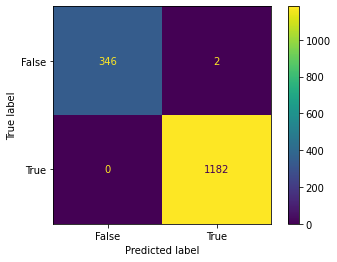

Validation Set
Accuracy Score :  0.9530026109660574
F1 Score       :  0.9711538461538461
              precision    recall  f1-score   support

       False       0.94      0.82      0.87        76
        True       0.96      0.99      0.97       307

    accuracy                           0.95       383
   macro avg       0.95      0.90      0.92       383
weighted avg       0.95      0.95      0.95       383



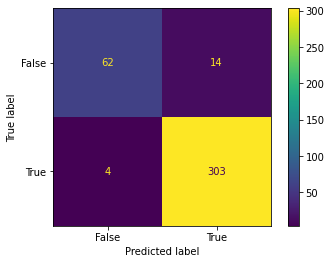

In [102]:
print('Train Set')
score_report(X_train, y_train, pipe)
print('Validation Set')
score_report(X_val, y_val, pipe)


## **4. 모델 최적화**
*   Permutation Importance를 이용해 Feature를 선택함.
*   Cross-Validation 방법을 통해 하이퍼파라미터 최적화.



### Feature Selection

In [103]:
def permute(X_data, y_data, model_learning):
  ## Permutation Importance Viewer ##

  permuter = PermutationImportance(pipe.named_steps[model_learning],
                                   scoring='accuracy', n_iter=5, random_state=2)
  permuter.fit(X_data, y_data);
  feature_names = X_data.columns.tolist()

  # 특성별 score 
  display(eli5.show_weights(permuter, top=None, feature_names=feature_names))
  
  return permuter

In [104]:
permuter = permute(X_train,y_train, 'xgbclassifier')

Weight,Feature
0.1016 ± 0.0107,abnormal_short_term_variability
0.0850 ± 0.0103,accelerations
0.0370 ± 0.0053,mean_value_of_short_term_variability
0.0254 ± 0.0042,histogram_mean
0.0166 ± 0.0046,uterine_contractions
0.0157 ± 0.0029,prolongued_decelerations
0.0111 ± 0.0017,percentage_of_time_with_abnormal_long_term_variability
0.0044 ± 0.0025,histogram_min
0.0037 ± 0.0013,histogram_mode
0.0029 ± 0.0013,baseline value


Accuracy Score :  0.9477806788511749
F1 Score       :  0.9678456591639871
              precision    recall  f1-score   support

       False       0.91      0.82      0.86        76
        True       0.96      0.98      0.97       307

    accuracy                           0.95       383
   macro avg       0.93      0.90      0.91       383
weighted avg       0.95      0.95      0.95       383



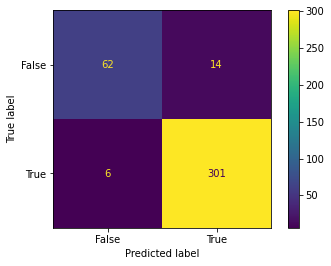

In [105]:
#Feature Selection

minimum_importance = 0.001

# 최저 중요도 미만의 feature를 제거.
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]

X_train_selected = X_train[features]
X_val_selected = X_val[features]

pipe.fit(X_train_selected, y_train);
score_report(X_val_selected, y_val, pipe)

In [116]:
# 모델의 결과가 오히려 열화되었으므로, 다시 칼럼 제거 전 데이터로 다시 모델 학습.
pipe.fit(X_train, y_train);

###  CV Hyperparameter Tuning

In [108]:
#Cross-Validation
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint, uniform
def fit_trees(X_data, y_data, pipe):
    dists = {
    'xgbclassifier__n_estimators': randint(10, 1000), 
    'xgbclassifier__min_child_weight' : uniform(0,100),
    'xgbclassifier__max_depth': [3, 5, 10, 15, 50, None],
    'xgbclassifier__learning_rate' : uniform(0.01, 1),
    'xgbclassifier__max_delta_step' : uniform(1,10)
    #'randomforestclassifier__max_features': uniform(0, 1)
    }
    
    clf = RandomizedSearchCV(pipe,random_state=42, param_distributions=dists, 
                             n_iter=500, 
                             cv=5,
                             scoring='accuracy',
                             verbose=1,
                             n_jobs=-1)
    clf.fit(X_train, y_train)

    return clf

clf = fit_trees(X_train, y_train, pipe)

Best CV params: {'xgbclassifier__learning_rate': 0.2392513952326415, 'xgbclassifier__max_delta_step': 8.222525683930662, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1.2203072318044517, 'xgbclassifier__n_estimators': 636} 

Accuracy Score :  0.9634464751958225
F1 Score       :  0.9774193548387097
              precision    recall  f1-score   support

       False       0.94      0.87      0.90        76
        True       0.97      0.99      0.98       307

    accuracy                           0.96       383
   macro avg       0.96      0.93      0.94       383
weighted avg       0.96      0.96      0.96       383



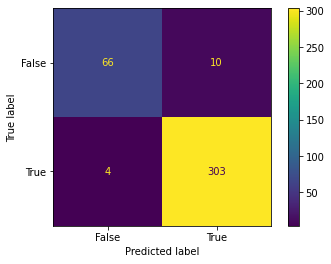

In [113]:
#Best CV params {'xgbclassifier__learning_rate': 0.15637399216224912, 'xgbclassifier__max_delta_step': 4.675344222915315, 
#'xgbclassifier__max_depth': 50, 'xgbclassifier__min_child_weight': 2.5811906949486985, 'xgbclassifier__n_estimators': 546}

#Best CV params {'xgbclassifier__learning_rate': 0.2392513952326415, 'xgbclassifier__max_delta_step': 8.222525683930662, 
#'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1.2203072318044517, 'xgbclassifier__n_estimators': 636}

print("Best CV params:", clf.best_params_, '\n')
score_report(X_val, y_val, clf)

##**5. 인사이트**

Accuracy Score :  0.9530516431924883
F1 Score       :  0.9704142011834319
              precision    recall  f1-score   support

       False       0.95      0.83      0.89        47
        True       0.95      0.99      0.97       166

    accuracy                           0.95       213
   macro avg       0.95      0.91      0.93       213
weighted avg       0.95      0.95      0.95       213



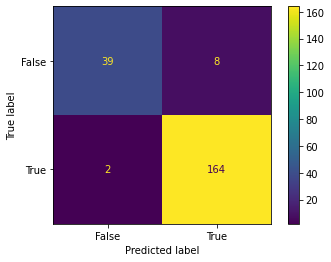

In [115]:
#테스트 세트로 최종 모델 검증.
#학습/검증에 사용되지 않은 데이터로, 만들어진 모델의 일반화 성능 확인.
score_report(X_test, y_test, clf)


*   Baseline 모델에 비해 상당히 향상된 예측 결과가 나타났다.
*   그러나 False Label(추가 진단 필요)의 진단 정확성이 그다지 높지 않다.
>  실제 문제가 있는 경우를 정확하게 진단하는 것이 더 중요하다.
*   모델이 아래의 3가지 특성을 중점적으로 활용하여 예측한 것으로 보인다. 그러나 중요도가 낮은 데이터를 삭제했을 때 모델의 예측이 부정확해지므로 feature와 target 간 추가적인 분석이 필요하다.
> 1.   abnormal_short_term_variability
> 2.   accelerations
> 3.   mean_value_of_short_term_variability

*   데이터셋은 2,000여개의 표본으로 더 많은 데이터를 통한 추가적인 학습과 모델 개선이 필요하다.





